In [64]:
import numpy as np
import matplotlib.pyplot as plt

식을 하나 만들어보자

In [65]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

시그모이드 값을 구한다.
값이 0에서 1사이 값이 나온다.

In [66]:
x=np.arange(-5, 5, 0.1)
y=sigmoid(x)
print(y)

[0.00669285 0.00739154 0.00816257 0.0090133  0.0099518  0.01098694
 0.01212843 0.01338692 0.01477403 0.0163025  0.01798621 0.01984031
 0.02188127 0.02412702 0.02659699 0.02931223 0.03229546 0.03557119
 0.03916572 0.04310725 0.04742587 0.05215356 0.05732418 0.06297336
 0.06913842 0.07585818 0.0831727  0.09112296 0.09975049 0.10909682
 0.11920292 0.13010847 0.14185106 0.15446527 0.16798161 0.18242552
 0.19781611 0.21416502 0.23147522 0.24973989 0.26894142 0.2890505
 0.31002552 0.33181223 0.35434369 0.37754067 0.40131234 0.42555748
 0.450166   0.47502081 0.5        0.52497919 0.549834   0.57444252
 0.59868766 0.62245933 0.64565631 0.66818777 0.68997448 0.7109495
 0.73105858 0.75026011 0.76852478 0.78583498 0.80218389 0.81757448
 0.83201839 0.84553473 0.85814894 0.86989153 0.88079708 0.89090318
 0.90024951 0.90887704 0.9168273  0.92414182 0.93086158 0.93702664
 0.94267582 0.94784644 0.95257413 0.95689275 0.96083428 0.96442881
 0.96770454 0.97068777 0.97340301 0.97587298 0.97811873 0.980159

그래프를 그려보자.

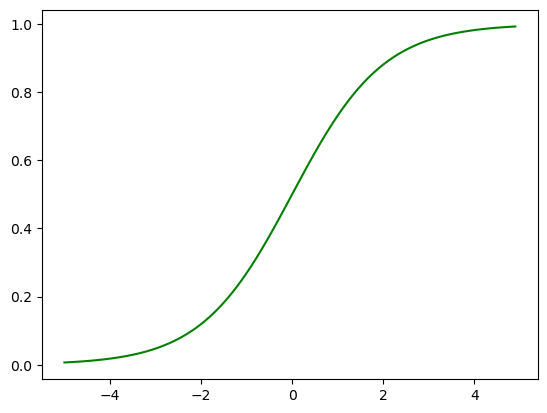

In [67]:
plt.plot(x, y, 'g') #그래프 색은 녹색

w가 1이고 b가 0인 회귀식을 시그모이드 취하면 위의 소수점 값들이다.
y=x
w=1 b=0


w를 조절하는 회귀식
가중치가 0.5, 1, 2다.

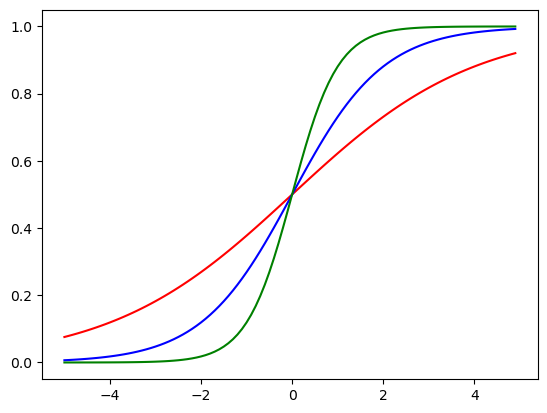

In [68]:
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'g')

g가 가장 많이 휘었다. 가중치 w가 커질 수록 가장 많이 휜다.

b를 조절하는 회귀식
b는 바이어스

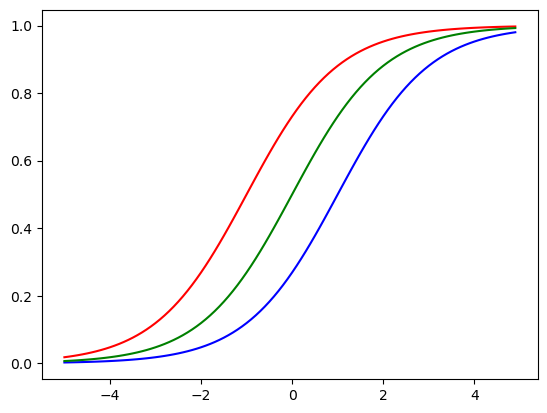

In [69]:
y1 = sigmoid(x+1)
y2 = sigmoid(x-1)
y3 = sigmoid(x)

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'g')

그래프가 -1 한 그래프가 오른쪽에 있다. +1이 왼쪽으로 간다.
두개다 합치면 그래프가 휘어진다? ㅇㅁㅇ?
아까전 처럼 만들려면

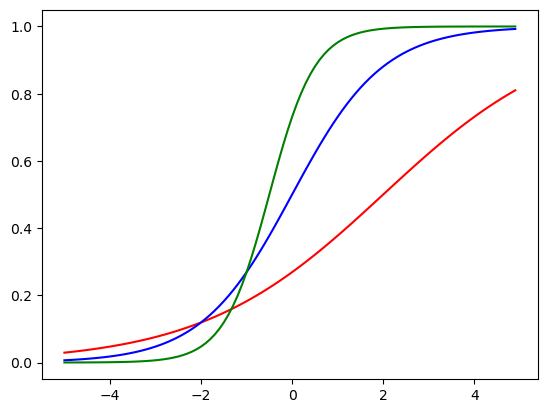

In [70]:
y1 = sigmoid(0.5*x-1)
y2 = sigmoid(x)
y3 = sigmoid(2*x+1)

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'g')

w는 그래프가 많이 휘게. b 높으면 높을 수록 왼쪽 이동
왼쪽으로 간다는 것은 1이 되는게 많다는 뜻이래..?

많이 휘면 0과 1이 더 많아 진다.

파이토치 쓰려면 토치 필요

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
torch.manual_seed(0) 

랜덤하게 숫자를 넣으면 seed 안정하면 계속 튀니까 잡고 시작.
2차원 데이터를 만들어보자.

In [72]:
x_data = torch.FloatTensor([[1,2], [2,3], [3,1], [4,3], [5,3],[6,2]])
y_data = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])

print(x_data)
print(y_data)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [73]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

옵티 설정
lr=0.1 0 아니면 1 이 답이니까 미세하게 안줘도 된다.

In [74]:
optimizer = optim.SGD([W, b], lr=0.1)
epochs = 1001

In [75]:
#손실함수 구하기
for epoch in range(epochs):
  h=torch.sigmoid(x_data.matmul(W)+b)
  cost=-(y_data*torch.log(h) + (1-y_data)*torch.log(1-h)).mean() 

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print(f'epoch:{epoch}, cost:{cost.item()}')


epoch:0, cost:0.6931471824645996
epoch:100, cost:0.41432666778564453
epoch:200, cost:0.34952056407928467
epoch:300, cost:0.3013016879558563
epoch:400, cost:0.26353225111961365
epoch:500, cost:0.23351818323135376
epoch:600, cost:0.20931296050548553
epoch:700, cost:0.1894957274198532
epoch:800, cost:0.17303510010242462
epoch:900, cost:0.15917940437793732
epoch:1000, cost:0.14737461507320404


nn.Modual 사용

In [76]:
model = nn.Sequential(
  nn.Linear(2,1),
  nn.Sigmoid()
)

model(x_data)

tensor([[0.5427],
        [0.6331],
        [0.4456],
        [0.6306],
        [0.6294],
        [0.5362]], grad_fn=<SigmoidBackward0>)

0.5 미만이 0이면 이거 다 0인 상태야.

In [77]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0053,  0.3793]], requires_grad=True), Parameter containing:
tensor([-0.5820], requires_grad=True)]


In [78]:
optimizer=optim.SGD(model.parameters(), lr=0.1)
epochs=1001

In [79]:
for epoch in range(epochs):
  h=model(x_data)
  cost = F.binary_cross_entropy(h, y_data)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print(f'epoch:{epoch}, cost:{cost.item()}')

epoch:0, cost:0.6537237167358398
epoch:100, cost:0.3699168264865875
epoch:200, cost:0.3142516016960144
epoch:300, cost:0.27362096309661865
epoch:400, cost:0.24157853424549103
epoch:500, cost:0.21585197746753693
epoch:600, cost:0.1948794573545456
epoch:700, cost:0.17753003537654877
epoch:800, cost:0.16298051178455353
epoch:900, cost:0.15062661468982697
epoch:1000, cost:0.1400187760591507


수업자료대로

In [80]:
for epoch in range(epochs):
  h=model(x_data)
  cost = F.binary_cross_entropy(h, y_data)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    pred=h>=torch.FloatTensor([0.5])
    print(f'epoch:{epoch}, cost:{cost.item()}')
    print(pred) #0.5 이상이면 1, 이하면 0

epoch:0, cost:0.13992029428482056
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
epoch:100, cost:0.13073264062404633
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
epoch:200, cost:0.12269137054681778
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
epoch:300, cost:0.11559674888849258
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
epoch:400, cost:0.10929185897111893
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
epoch:500, cost:0.10365232825279236
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
epoch:600, cost:0.09857824444770813
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
epoch:700, cost:0.09398851543

In [81]:
for epoch in range(epochs):
  h=model(x_data)
  cost = F.binary_cross_entropy(h, y_data)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    pred=h>=torch.FloatTensor([0.5])
    corr_pred=pred.float()
    print(f'epoch:{epoch}, cost:{cost.item()}')
    print(corr_pred) #0.5 이상이면 1, 이하면 0

epoch:0, cost:0.08248331397771835
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
epoch:100, cost:0.07927373796701431
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
epoch:200, cost:0.07631047815084457
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
epoch:300, cost:0.07356608659029007
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
epoch:400, cost:0.0710168406367302
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
epoch:500, cost:0.0686425119638443
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
epoch:600, cost:0.06642540544271469
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
epoch:700, cost:0.064350426197052
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
epoch:800, cost:0.06240410730242729
te

In [82]:
for epoch in range(epochs):
  h=model(x_data)
  cost = F.binary_cross_entropy(h, y_data)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    pred=h>=torch.FloatTensor([0.5])
    corr_pred=pred.float()==y_data #비교하면 맞춘거면 true, 아니면 false
    print(f'epoch:{epoch}, cost:{cost.item()}')
    print(corr_pred) #0.5 이상이면 1, 이하면 0

epoch:0, cost:0.058835145086050034
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
epoch:100, cost:0.057210635393857956
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
epoch:200, cost:0.05567537620663643
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
epoch:300, cost:0.05422207713127136
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
epoch:400, cost:0.05284428596496582
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
epoch:500, cost:0.05153622850775719
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
epoch:600, cost:0.05029265955090523
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
epoch:700, cost:0.04910880699753761
tensor([[True],
        [True],
 

정확도 구하기

In [83]:
for epoch in range(epochs):
  h=model(x_data)
  cost = F.binary_cross_entropy(h, y_data)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    pred=h>=torch.FloatTensor([0.5])
    corr_pred=pred.float()==y_data #비교하면 맞춘거면 true, 아니면 false
    accuracy = corr_pred.sum().item()/len(corr_pred)
    print(f'epoch:{epoch}, cost:{cost.item()}')
    print(accuracy) #0.5 이상이면 1, 이하면 0

epoch:0, cost:0.045865368098020554
1.0
epoch:100, cost:0.04488225281238556
1.0
epoch:200, cost:0.04394115135073662
1.0
epoch:300, cost:0.04303939640522003
1.0
epoch:400, cost:0.04217454791069031
1.0
epoch:500, cost:0.041344355791807175
1.0
epoch:600, cost:0.040546711534261703
1.0
epoch:700, cost:0.039779793471097946
1.0
epoch:800, cost:0.03904179483652115
1.0
epoch:900, cost:0.038331106305122375
1.0
epoch:1000, cost:0.03764623776078224
1.0


정확도가 1 나온다는건 100%라는 말임.

In [84]:
for epoch in range(epochs):
  h=model(x_data)
  cost = F.binary_cross_entropy(h, y_data)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    pred=h>=torch.FloatTensor([0.5])
    corr_pred=pred.float()==y_data #비교하면 맞춘거면 true, 아니면 false
    accuracy = corr_pred.sum().item()/len(corr_pred)
    print(f'epoch:{epoch}, cost:{cost.item()}, accuracy:{accuracy}')
    print(accuracy) #0.5 이상이면 1, 이하면 0

epoch:0, cost:0.03763948753476143, accuracy:1.0
1.0
epoch:100, cost:0.03697924688458443, accuracy:1.0
1.0
epoch:200, cost:0.036342132836580276, accuracy:1.0
1.0
epoch:300, cost:0.03572685644030571, accuracy:1.0
1.0
epoch:400, cost:0.03513241186738014, accuracy:1.0
1.0
epoch:500, cost:0.03455767408013344, accuracy:1.0
1.0
epoch:600, cost:0.03400168940424919, accuracy:1.0
1.0
epoch:700, cost:0.03346354141831398, accuracy:1.0
1.0
epoch:800, cost:0.03294239938259125, accuracy:1.0
1.0
epoch:900, cost:0.03243745490908623, accuracy:1.0
1.0
epoch:1000, cost:0.03194792941212654, accuracy:1.0
1.0


분류를 할때는 선형회기보다 lr을 크게, run을 많이 안돌려도 괜찮아.
어쨌든 임게치 0.5 이상이면 1이니까. 퉁쳐

선형회귀는 정확도 계산이 안됨.
5가 정답인데 4.99999 5.00001로 나오니까 정확도를 하지 않고, 오차값이 얼마나 줄어드는지
wb값이 어떻게 되는지를 중요하게 봐.

분류는 정확도가 중요해. 실제 모델과 내 모델이 얼마나 정확한가.

클래스로 파이토치 모델 구현

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self): #모델 생성하기 위한 요소들을 나열
    super().__init__() 
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()
  def forward(self, x): #model 을 부를때
    return self.sigmoid(self.linear(x))
#모델생성
model1 = BinaryClassifier()

In [86]:
print(list(model.parameters()))
print(list(model1.parameters()))

[Parameter containing:
tensor([[2.7952, 1.2645]], requires_grad=True), Parameter containing:
tensor([-12.3466], requires_grad=True)]
[Parameter containing:
tensor([[-0.5204, -0.2723]], requires_grad=True), Parameter containing:
tensor([0.1896], requires_grad=True)]


In [87]:
optimizer=optim.SGD(model1.parameters(), lr=0.1)
epochs=1001

In [88]:
for epoch in range(epochs):
  h=model1(x_data)
  cost = F.binary_cross_entropy(h, y_data)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    pred=h>=torch.FloatTensor([0.5])
    corr_pred=pred.float()==y_data #비교하면 맞춘거면 true, 아니면 false
    accuracy = corr_pred.sum().item()/len(corr_pred)
    print(f'epoch:{epoch}, cost:{cost.item()}, accuracy:{accuracy}')


epoch:0, cost:1.707863688468933, accuracy:0.5
epoch:100, cost:0.436233788728714, accuracy:0.8333333333333334
epoch:200, cost:0.36627721786499023, accuracy:0.8333333333333334
epoch:300, cost:0.3143743574619293, accuracy:0.8333333333333334
epoch:400, cost:0.273832231760025, accuracy:0.8333333333333334
epoch:500, cost:0.24174518883228302, accuracy:1.0
epoch:600, cost:0.21598438918590546, accuracy:1.0
epoch:700, cost:0.1949874311685562, accuracy:1.0
epoch:800, cost:0.17761977016925812, accuracy:1.0
epoch:900, cost:0.16305629909038544, accuracy:1.0
epoch:1000, cost:0.1506912261247635, accuracy:1.0


정확도는 1 하고 나오지만 모델의 값을 넣어서 1, 0 으로 나오는게 아니라 0.341 이런 형태로 나와

In [90]:
result=model1(x_data)
result

tensor([[0.0312],
        [0.1595],
        [0.3071],
        [0.7804],
        [0.9389],
        [0.9800]], grad_fn=<SigmoidBackward0>)

우리는 0이나 1이라는 명확한 값을 구하고 싶은 거니까.

In [95]:
def predict(x):
  h=model1(x)
  result=[]
  for i in range(len(h)):
    if h[i]>= 0.5:
      result.append(1)
    else:
      result.append(0)
  return h, result #자바는 한꺼번에 리턴, 파이썬은 각각 리턴가능이래

In [ ]:
h, result= predict(x_data)
print(h) #원래의 정답
print(result) # 0.5를 for문 돌면서

tensor([[0.0312],
        [0.1595],
        [0.3071],
        [0.7804],
        [0.9389],
        [0.9800]], grad_fn=<SigmoidBackward0>)
[0, 0, 0, 1, 1, 1]


큰값만 해서 db로 저장한다는 말이, 확실한 값을 학습결과를 저장할때도 사용할 수 있데
0.4999999 이런 애매한 값은 실제 분류하고 db화 할때 애매한건 뺀다.